# Confidence Interval

Compare confidence interval for noisy and non-noisy datasets. 
Use polynomial / linear regression.
For each dataset, carry the experiment 10 times to compute confidence intervals.

1. Vary the value of sigma of noise, to see changes.
2. Vary number of samples. 
3. Try multiple confidence scores.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

## Utility Functions

In [15]:
def train_and_predict(X_train, y_train, X_test):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model.predict(X_test)

def confidence(predictions, z_value=1.96):
    """
    Returns the size of confidence interval for a given z_value corresnponding confidence level.
    Default z_value = 1.96 corresponds to 95 percent confidence level.
    """
    n_experiments = len(predictions)
    predictions = np.array(predictions)
    mean = np.mean(predictions)
    std = np.std(predictions)
    delta = z_value * std / np.sqrt(n_experiments)
    print(mean, " +- ", delta)
    return delta * 2


## 1. Vary the $\sigma$ of noise

As standard deviation of noise increases, the size of confidence interval increases. 

X	mean: -0.06781123382603008, std: 8.097045982269254
y	mean: 35.66094383086985, std: 40.485229911346266
0.7839083940724494  +-  0.005068387995564874
2.4338324391635378  +-  0.015599881199761596
3.9998901004918492  +-  0.025036917709494417
5.328751786729136  +-  0.04185857183096621
7.448880768464754  +-  0.04263488364715165
8.991276431643794  +-  0.06337132946609786
10.16403717859427  +-  0.07120143365335316
11.873650428530134  +-  0.07796672122493295
13.945843907608703  +-  0.08638206888356618
15.645902245196542  +-  0.11506015705870436
16.76369978434787  +-  0.1163011296831106
18.95220167704062  +-  0.13971996149963334
19.66262216407598  +-  0.13935680497190733
21.499053061463393  +-  0.14571044432549482
23.051395846979048  +-  0.166223089811028
24.202863742215932  +-  0.1568988252402927
27.105648496388554  +-  0.19997635211191175
26.760800054960143  +-  0.22298192379658888
29.654559335203718  +-  0.20412580952845333
31.756731931978724  +-  0.2259264393393031


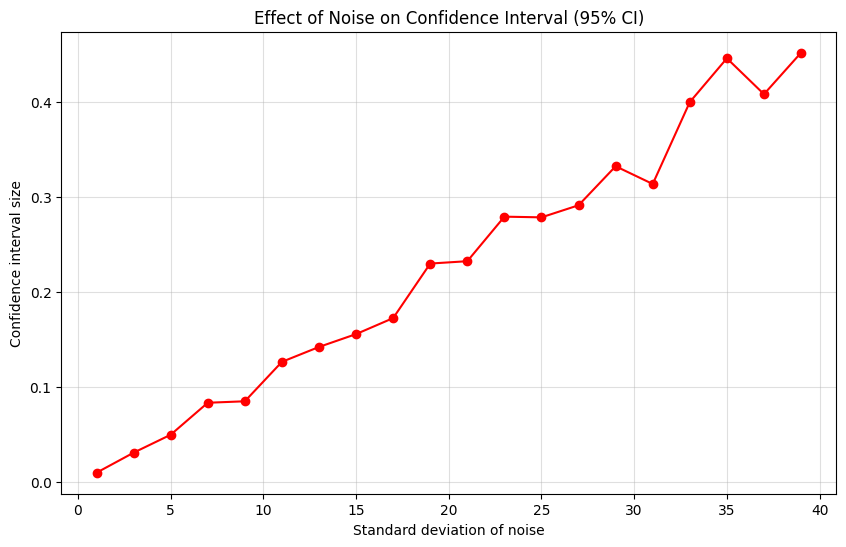

In [30]:
dataset_size = 1000
std_deviation = 8 ## standard deviation of X
n_experiments = 100

# Generate random points from normal distribution with standard deviation of 8
X = np.random.randn(dataset_size, 1) * std_deviation
y = 5 * X + 36
print(f'X\tmean: {X.mean()}, std: {X.std()}')
print(f'y\tmean: {y.mean()}, std: {y.std()}')

noise_std_deviation = 1
noise_values = []
interval = []

for i in range (20):
    noise_values.append(noise_std_deviation)
    noise = np.random.randn(len(y), 1) * noise_std_deviation
    y_noisy = y + noise

    noisy_predictions = []

    for _ in range(n_experiments): 
        # Train on noisy data
        X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3)
        preds = train_and_predict(X_train, y_train, X_test)
        mae = np.mean(np.abs(preds - y_test))
        noisy_predictions.append(mae)
    
    interval.append(confidence(noisy_predictions))
    
    noise_std_deviation += 2

plt.figure(figsize=(10, 6))
plt.plot(noise_values, interval, 'o-', color='red')
plt.xlabel("Standard deviation of noise")
plt.ylabel("Confidence interval size")
plt.title("Effect of Noise on Confidence Interval (95% CI)")
plt.grid(True, alpha=0.4)
plt.show()

## 2. Vary Number of Samples

As we increase the availabe dataset size, keeping the standard deviation of noise constant, the size of the confidence interval decreases.

3.8958435881694378  +-  0.0867853288189617
4.127294928000966  +-  0.058598154027838176
4.030769925524572  +-  0.043627253720590446
4.192780512166267  +-  0.03857425578846545
4.166292722935987  +-  0.03302545897759926
3.8721906055730657  +-  0.031096938836412284
3.9568872724707886  +-  0.02986061811054106
4.11106213759953  +-  0.028111203674607104
4.205338406782562  +-  0.025248997151870227
4.037022607663247  +-  0.024642040457039705
4.0481262834791565  +-  0.021688861843763403
3.883416431572866  +-  0.022579826946532214
3.8746381851979548  +-  0.019268952724135025
4.0267414958023116  +-  0.020478687968119823
3.90675934493479  +-  0.017659056593628715
3.954530100244512  +-  0.018076009337794373
4.070965206096573  +-  0.01825432883116698
3.922037835865936  +-  0.017988132111743407
4.005664508062344  +-  0.017843525307183958
3.9144425196104744  +-  0.017172367148891036


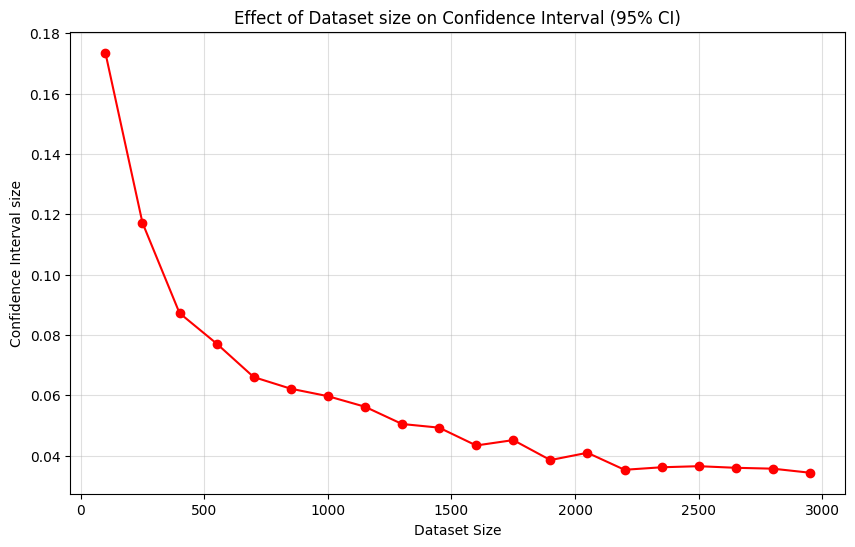

In [31]:
dataset_size = 100
std_deviation = 8 ## standard deviation of X
n_experiments = 100

noise_std_deviation = 5
data_sizes = []
interval = []

for i in range (20):
    # Generate random points from normal distribution with standard deviation of 8
    X = np.random.randn(dataset_size, 1) * std_deviation
    y = 5 * X + 36
    data_sizes.append(dataset_size)
    noise = np.random.randn(len(y), 1) * noise_std_deviation
    y_noisy = y + noise

    noisy_predictions = []

    for _ in range(n_experiments): 
        # Train on noisy data
        X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3)
        preds = train_and_predict(X_train, y_train, X_test)
        mae = np.mean(np.abs(preds - y_test))
        noisy_predictions.append(mae)
    
    interval.append(confidence(noisy_predictions))
    
    dataset_size += 150

plt.figure(figsize=(10, 6))
plt.plot(data_sizes, interval, 'o-', color='red')
plt.xlabel("Dataset Size")
plt.ylabel("Confidence Interval size")
plt.title("Effect of Dataset size on Confidence Interval (95% CI)")
plt.grid(True, alpha=0.4)
plt.show()

## 3. Multiple Confidence Level

As we increase the condifence level, the size of the confidence interval also increases. Typical position vs uncertainty, if you remember heisenberg's uncertainty principle. 

3.9772968972739915  +-  0.023314625501101353
4.002926099054273  +-  0.029557307063583706
3.9681572462919275  +-  0.03795427399558804
3.9918038479222617  +-  0.04598679918858074


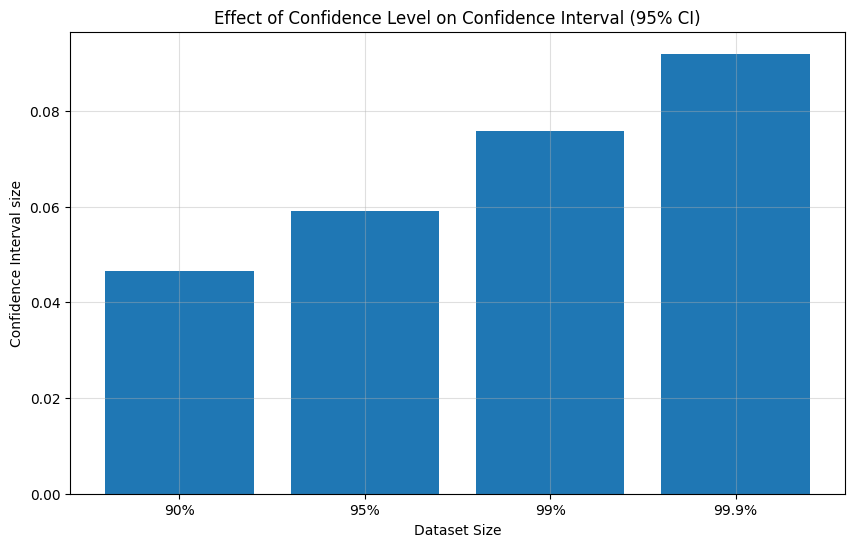

In [33]:
dataset_size = 1000
std_deviation = 8 ## standard deviation of X
n_experiments = 100
noise_std_deviation = 5

X = np.random.randn(dataset_size, 1) * std_deviation
y = 5 * X + 36
noise = np.random.randn(len(y), 1) * noise_std_deviation
y_noisy = y + noise

confidence_levels = {
    '90%': 1.645,
    '95%': 1.96,
    '99%': 2.576,
    '99.9%': 3.291
}

results = {}

for confidence_level, z_val in confidence_levels.items():
    noisy_predictions = []
    for _ in range(n_experiments): 
        # Train on noisy data
        X_train, X_test, y_train, y_test = train_test_split(X, y_noisy, test_size=0.3)
        preds = train_and_predict(X_train, y_train, X_test)
        mae = np.mean(np.abs(preds - y_test))
        noisy_predictions.append(mae)
    
    results[confidence_level] = confidence(noisy_predictions, z_value=z_val)

plt.figure(figsize=(10, 6))
plt.bar(results.keys(), results.values())
plt.xlabel("Dataset Size")
plt.ylabel("Confidence Interval size")
plt.title("Effect of Confidence Level on Confidence Interval (95% CI)")
plt.grid(True, alpha=0.4)
plt.show()